In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [2]:
#load the data
data=pd.read_csv("bankruptcy_HW1_train.csv")

In [3]:
data

,Unnamed: 0,Bankrupt?,Net worth/Assets,Debt ratio %,ROA(C) before interest and depreciation before interest,Per Share Net profit before tax (Yuan ¥)
0,0,0,0.888200,0.111800,0.500951,0.184454
1,1,0,0.847689,0.152311,0.479647,0.166755
2,2,0,0.966895,0.033105,0.516502,0.181969
3,3,0,0.906310,0.093690,0.446302,0.167960
4,4,0,0.882396,0.117604,0.575245,0.179935
...,...,...,...,...,...,...
9257,9257,1,0.831733,0.168267,0.477591,0.171951
9258,9258,1,0.793736,0.206264,0.449358,0.153730
9259,9259,1,0.838023,0.161977,0.437023,0.144037
9260,9260,1,0.779120,0.220880,0.369713,0.131477


In [4]:
#去掉多餘的欄位
data=data.drop(["Unnamed: 0"],axis=1)
data

,Bankrupt?,Net worth/Assets,Debt ratio %,ROA(C) before interest and depreciation before interest,Per Share Net profit before tax (Yuan ¥)
0,0,0.888200,0.111800,0.500951,0.184454
1,0,0.847689,0.152311,0.479647,0.166755
2,0,0.966895,0.033105,0.516502,0.181969
3,0,0.906310,0.093690,0.446302,0.167960
4,0,0.882396,0.117604,0.575245,0.179935
...,...,...,...,...,...
9257,1,0.831733,0.168267,0.477591,0.171951
9258,1,0.793736,0.206264,0.449358,0.153730
9259,1,0.838023,0.161977,0.437023,0.144037
9260,1,0.779120,0.220880,0.369713,0.131477


In [5]:
data_trian=data.drop(["Bankrupt?"],axis=1)
data_trian

,Net worth/Assets,Debt ratio %,ROA(C) before interest and depreciation before interest,Per Share Net profit before tax (Yuan ¥)
0,0.888200,0.111800,0.500951,0.184454
1,0.847689,0.152311,0.479647,0.166755
2,0.966895,0.033105,0.516502,0.181969
3,0.906310,0.093690,0.446302,0.167960
4,0.882396,0.117604,0.575245,0.179935
...,...,...,...,...
9257,0.831733,0.168267,0.477591,0.171951
9258,0.793736,0.206264,0.449358,0.153730
9259,0.838023,0.161977,0.437023,0.144037
9260,0.779120,0.220880,0.369713,0.131477


In [6]:
#kmeans方法
#使用 silhouette_avgs(側影係數)方法決定k的數量
silhouette_avgs=[]
#測試2-5個k的狀況下的績效
ks = range(2,5)
for k in ks:
    kmeans_fit=cluster.KMeans(n_clusters = k ).fit(data_trian)
    cluster_labels=kmeans_fit.labels_
    silhouette_avg=metrics.silhouette_score(data_trian, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

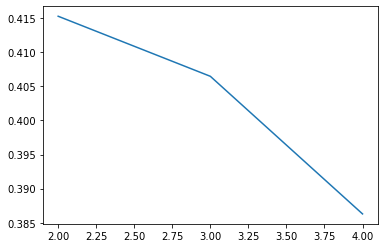

[0.4152854053461967, 0.40647406087373883, 0.3862892811622231]


In [7]:
plt.plot(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)
#發現在分成2類的時候表現特別好

In [8]:
#分成破產和沒破產兩類
#0是沒破產,1是破產的
kmeans_fit=cluster.KMeans(n_clusters = 2 ).fit(data_trian)
cluster_labels=kmeans_fit.labels_
cluster_labels=pd.DataFrame(cluster_labels, columns = ['predict'])
cluster_labels

,predict
0,1
1,0
2,1
3,1
4,1
...,...
9257,0
9258,0
9259,0
9260,0


In [9]:
#取出value=0,1的inedx，作為篩選index
cluster1_index=cluster_labels["predict"]==1
cluster2_index=cluster_labels["predict"]==0

In [10]:
#破產的
cluster1_data=data[cluster1_index]
cluster1_data

,Bankrupt?,Net worth/Assets,Debt ratio %,ROA(C) before interest and depreciation before interest,Per Share Net profit before tax (Yuan ¥)
0,0,0.888200,0.111800,0.500951,0.184454
2,0,0.966895,0.033105,0.516502,0.181969
3,0,0.906310,0.093690,0.446302,0.167960
4,0,0.882396,0.117604,0.575245,0.179935
5,0,0.867128,0.058591,0.577195,0.218122
...,...,...,...,...,...
9218,1,0.857812,0.142188,0.482023,0.171895
9229,1,0.892066,0.107934,0.428968,0.158122
9234,1,0.898404,0.101596,0.487998,0.180643
9248,1,0.968491,0.031509,0.440464,0.163214


In [11]:
#沒破產的
cluster2_data=data[cluster2_index]
cluster2_data

,Bankrupt?,Net worth/Assets,Debt ratio %,ROA(C) before interest and depreciation before interest,Per Share Net profit before tax (Yuan ¥)
1,0,0.847689,0.152311,0.479647,0.166755
10,0,0.840433,0.136621,0.426266,0.152067
12,0,0.823533,0.176467,0.521669,0.187693
22,0,0.820721,0.179279,0.494808,0.174512
23,0,0.812770,0.187230,0.524740,0.200121
...,...,...,...,...,...
9257,1,0.831733,0.168267,0.477591,0.171951
9258,1,0.793736,0.206264,0.449358,0.153730
9259,1,0.838023,0.161977,0.437023,0.144037
9260,1,0.779120,0.220880,0.369713,0.131477


In [12]:
#破產的
cluster1_data.mean()

Bankrupt?                                                   0.096980
 Net worth/Assets                                           0.906136
 Debt ratio %                                               0.094271
 ROA(C) before interest and depreciation before interest    0.513273
 Per Share Net profit before tax (Yuan ¥)                   0.187444
dtype: float64

In [13]:
#沒破產的
cluster2_data.mean()

Bankrupt?                                                   0.816342
 Net worth/Assets                                           0.809399
 Debt ratio %                                               0.190599
 ROA(C) before interest and depreciation before interest    0.426452
 Per Share Net profit before tax (Yuan ¥)                   0.150989
dtype: float64